# 4. 파이차트 그리기
## 4.1 파이차트
- 각 범주(Category)가 데이터에서 차지하는 비율을 나타내는데 사용
- `pie(x, labels)` 이용
    - x: 값 (값들을 100을 기준으로 비율을 계산해 크기 설정)
    - labels : 값들의 label
    - autopct: 조각내에 표시될 비율의 문자열 형식. '%fmt문자' 
        - fmt문자: f(실수), d(정수), %% (%)
            

## 4.2 파이차트 활용
- 한국 웹브라우저 점유율을 파이차트로 작성
    - https://www.koreahtml5.kr/front/stats/browser/browserUseStats.do

In [13]:
import pandas as pd
df=pd.read_excel("data/webbrowser_share.xls",converters={"date":str},index_col='date')
# date column은 str으로 읽는다

In [5]:
!pip install xlrd

In [8]:
pd.options.display.max_columns=22 # 20개가 넘어가면 생략이 나오는데 방지해줌

In [16]:
df.iloc[0]

Chrome              59.12
IE                  31.06
Edge                 2.97
Safari               2.52
Whale Browser        1.36
Firefox              1.26
Opera                0.88
Swing                0.39
Phantom              0.25
UC Browser           0.03
Chromium             0.03
QQ Browser           0.02
Vivaldi              0.02
360 Safe Browser     0.02
Maxthon              0.02
Coc Coc              0.00
Puffin               0.00
Yandex Browser       0.01
Sogou Explorer       0.01
Mozilla              0.00
Whale                0.00
Name: 2018.08, dtype: float64

In [23]:
#점유율이 낮은 browser들을 묶어서 new column 생성
new=df[df.columns[4:]].sum(axis=1)
new
# .sum()의 default는 axis=0이라서 열 기준 합계를 구한다.

date
2018.08    4.30
2018.09    4.84
2018.10    3.78
2018.11    3.24
2018.12    4.32
2019.01    3.39
2019.02    3.43
2019.03    4.25
2019.04    4.52
2019.05    5.25
2019.06    5.93
2019.07    6.25
dtype: float64

In [28]:
wb_df=df[df.columns[:4]]
wb_df['new']=new
wb_df

C:\Users\Playdata\AppData\Local\Temp\ipykernel_16952\571661527.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wb_df['new']=new


,Chrome,IE,Edge,Safari,new
date,,,,,
2018.08,59.12,31.06,2.97,2.52,4.30
2018.09,61.95,27.84,3.16,2.19,4.84
2018.10,62.05,28.36,3.35,2.43,3.78
2018.11,65.31,26.29,3.06,2.09,3.24
2018.12,68.34,22.31,2.99,2.02,4.32
2019.01,70.46,21.05,2.99,2.07,3.39
2019.02,70.63,20.71,2.68,2.53,3.43
2019.03,63.35,25.42,3.81,3.16,4.25
2019.04,63.63,24.65,4.08,3.11,4.52


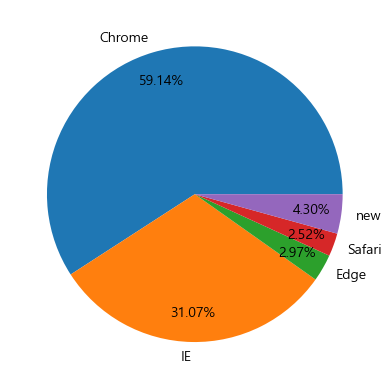

In [34]:
import matplotlib.pyplot as plt
plt.pie(wb_df.loc['2018.08'],labels=wb_df.columns,autopct="%.2f%%",pctdistance=0.8)
#pctdistance -> 반지름 비율이라 보면 될듯 1이하면 원 안에 1 초과는 원 밖에 있게 함
plt.show()

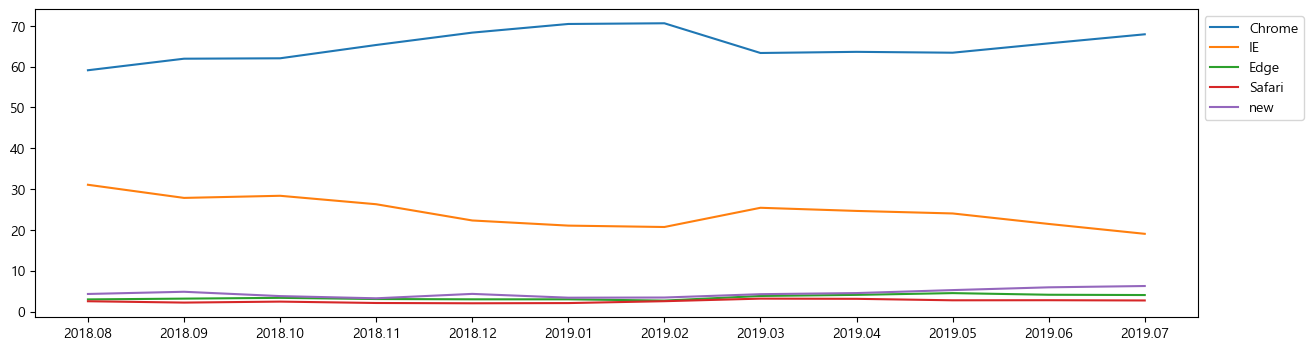

In [39]:
# chrome의 월별 점유율 변화
plt.figure(figsize=(15,4))
plt.plot(wb_df.index,wb_df['Chrome'],label='Chrome')
plt.plot(wb_df.index,wb_df['IE'],label='IE')
plt.plot(wb_df.index,wb_df['Edge'],label='Edge')
plt.plot(wb_df.index,wb_df['Safari'],label='Safari')
plt.plot(wb_df.index,wb_df['new'],label='new')
plt.legend(bbox_to_anchor=(1,1),loc='upper left')

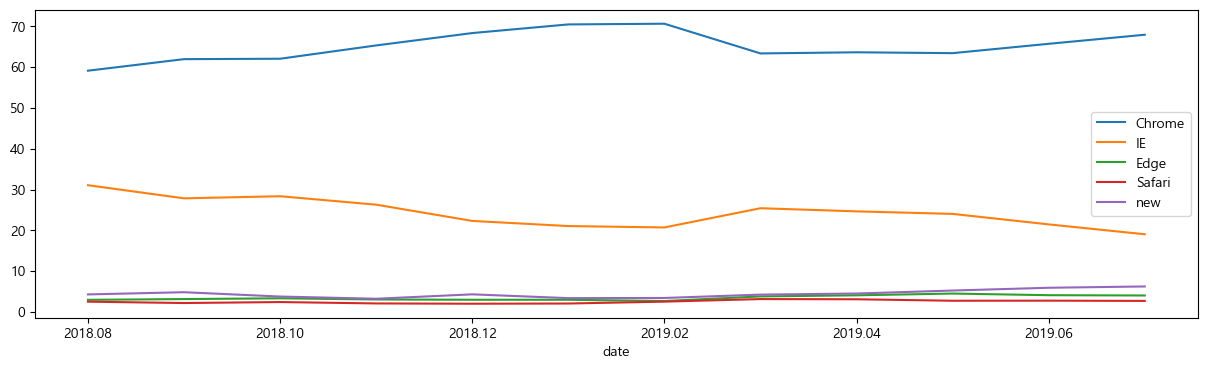

In [40]:
wb_df.plot(figsize=(15,4));

# 5 히스토그램(Histogram) 그리기
## 5.1 히스토그램

- 도수 분포표를 그래프로 나타낸 것.
    - 도수분포표: 연속형 자료를 특정 구간(bin)으로 나눠 그 빈도를 나타낸 표
        - 빈도 확인이나 **분포**를 볼때 사용한다.
    - X축: 계급(변수구간)의 대표값, Y축: 빈도수
- `hist(data [, bins=계급개수)` 메소드를 사용
    - data: 리스트형의 객체를 전달한다.

In [42]:
import numpy as np
import matplotlib.pyplot as plt

data = np.random.normal(100,10,1000)
data[:5]
# 평균 : 100, 표준편차 : 10의 정규분포를 따르는 난수 1000개 생성

array([122.11396536, 116.31729362,  87.96980025, 101.93483152,
        97.41824342])

In [43]:
s=pd.Series(data)
s.value_counts()

122.113965    1
104.878036    1
102.427745    1
99.195851     1
90.876316     1
             ..
86.629933     1
106.116730    1
103.293168    1
94.032293     1
114.923196    1
Name: count, Length: 1000, dtype: int64

In [52]:
pd.cut(s,bins=3).value_counts().to_frame().reset_index()

,index,count
0,"(86.337, 108.357]",720
1,"(108.357, 130.378]",192
2,"(64.251, 86.337]",88


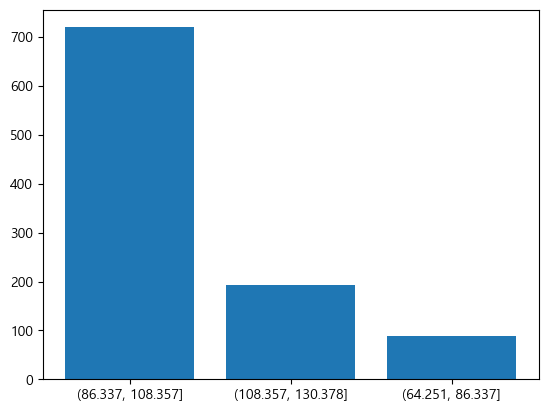

In [56]:
v=pd.cut(s,bins=3).value_counts().to_frame()
v.reset_index(inplace=True)


plt.bar(v["index"].astype("str"),v["count"])
plt.show()

In [ ]:
# histogram

## 5.2 히스토그램 활용
- tips.csv
    - 식당에서 팁을 지불한 손님의 정보를 모아둔 데이터 셋    

### total_bill 의 분포를 시각화

# 6. 상자그래프(Boxplot) 그리기
## 6.1 상자그래프란
- 연속형 값들의 사분위수, 극단값들을 이용해 값들의 분포를 시각화한다.
- boxplot(x, whis=1.5)
    - x: 데이터셋
    - whis: 극단치 계산시 사용할 값(기본 1.5)
        - IQR을 이용해 극단치 계산하기
            - IQR(Inter Quatile Range): $3분위수 - 1분위수$ 로 중간 50%값의 범위
            - 극단적으로 작은값: 1분위 - $IQR(3분위수-1분위수) * whis$   보다 작은 값들
            - 극단적으로 큰값: 3분위 + $IQR(3분위수-1분위수) * whis$  보다 큰 값들

In [66]:
data=np.random.randint(1,100,1000)

In [67]:
data[:5]=[200,250,-50,-100,-60]

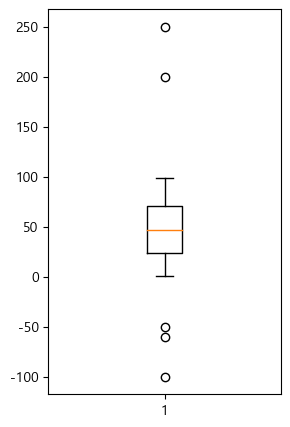

In [72]:
plt.figure(figsize=(3,5))
plt.boxplot(data,whis=1.5) #default값이 1.5이고 변경하고 싶을때 변경한다.
plt.show()

작은 박스가 정상범위 내 최대값 최소값 1분위,2분위,3분위를 나타낸다. 그리고 밖에 수들은 극단치(정상범위 넘어간 값)을 의미

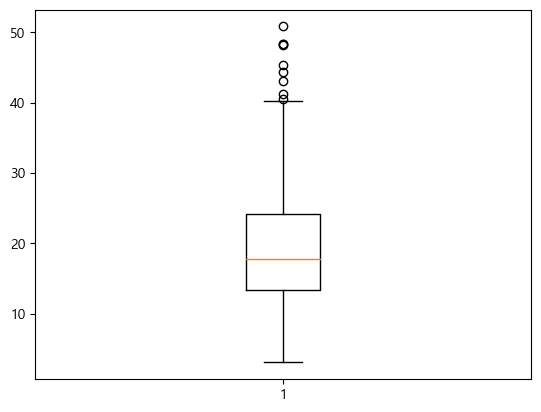

In [81]:
plt.boxplot(tips['total_bill'])
plt.show()

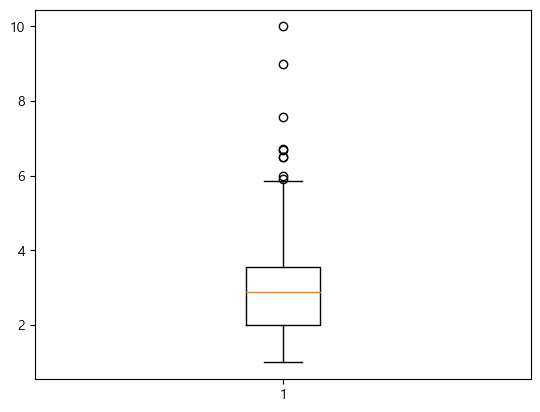

In [79]:
plt.boxplot(tips['tip'])
plt.show()

## 상자그래프 활용
- tips_df 에서 tip의 분포를 상자그래프로 확인

In [77]:
tips=pd.read_csv('data/tips.csv')

- 남녀별 tip의 분포를 하나의 boxplot에서 그려 비교
- 한 그래프에서 여러 데이터셋의 boxplot을 그리기.
    - 2차원 배열형태의 구조로로 데이터를 제공
    - 행(axis=0) 별로 그래프를 그린다.

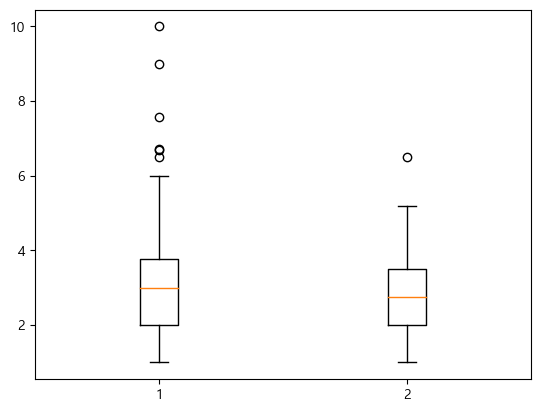

In [78]:
#boxplot([vlaues,values])
male_tip=tips.loc[tips['sex']=='Male','tip']
female_tip=tips.loc[tips['sex']=='Female','tip']

plt.boxplot([male_tip,female_tip],labels=['남성','여성'])
plt.xlabel('성별')
plt.ylabel('tip 액수')
plt.title('남녀별 tip의 분포')
plt.show()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
